In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import networkx as nx

In [102]:
def ODE(x,t,A,f,g,params):
    N = x.shape[0]
    dXdt = np.zeros(N)
    for n in range(0,N):
        dXdt[n] = f(x[n],params[:,n])
        for j in range(0,N):
            dXdt[n] += A[n,j]*g(x[n],x[j])
    return dXdt

In [129]:
def LV():
    def f(x,param):
        a = param[0]
        b = param[1]
        return x*(a-b*x)
    def g(x,y):
        return(-x*y)
    return f,g

def MP():
    def f(x,param):
        a = param[0]
        b = param[1]
        return x*(a-b*x)
    def g(x,y):
        return(x*(y**2)*((1+x**2)**(-1)))
    return f,g

def MM():
    def f(x,param):
        return -x
    def g(x,y):
        return (y**2)/(1+y**2)
    return f,g

def SIS():
    def f(x,param):
        return -param[0]*x
    def g(x,y):
        return (1-x)*y
    return f,g


def WC():
    def f(x,param):
        return -x
    def g(x,y):
        return 1/(1+np.exp(-(y-1)))
    return f,g

In [123]:
N=25
g = nx.barabasi_albert_graph(N,1)
A = nx.to_numpy_array(g)

a = np.random.uniform(0.5,1.5,N)
b = np.random.uniform(0.5,1.5,N)
LV_params = np.zeros((2,N))
LV_params[0,:] = a
LV_params[1,:] = b
MP_params = np.zeros((2,N))
MP_params[0,:] = a
MP_params[1,:] = b

MM_params = np.zeros((1,N))

SIS_params = np.random.uniform(0.5,1.5,N).reshape(1,N)
WC_params = np.zeros((1,N))

x0 = np.random.uniform(0,1,N)
LV_IC = x0
MP_IC = x0
MM_IC = np.random.uniform(0,2,N)
SIS_IC = np.random.uniform(0,0.1,N)
WC_IC = np.random.uniform(0,10,N)

In [115]:
#x0 = np.random.uniform(0,1,N)
T = 5
dt = 0.05
nT = int(T/dt) 
t = np.linspace(0,T,nT)

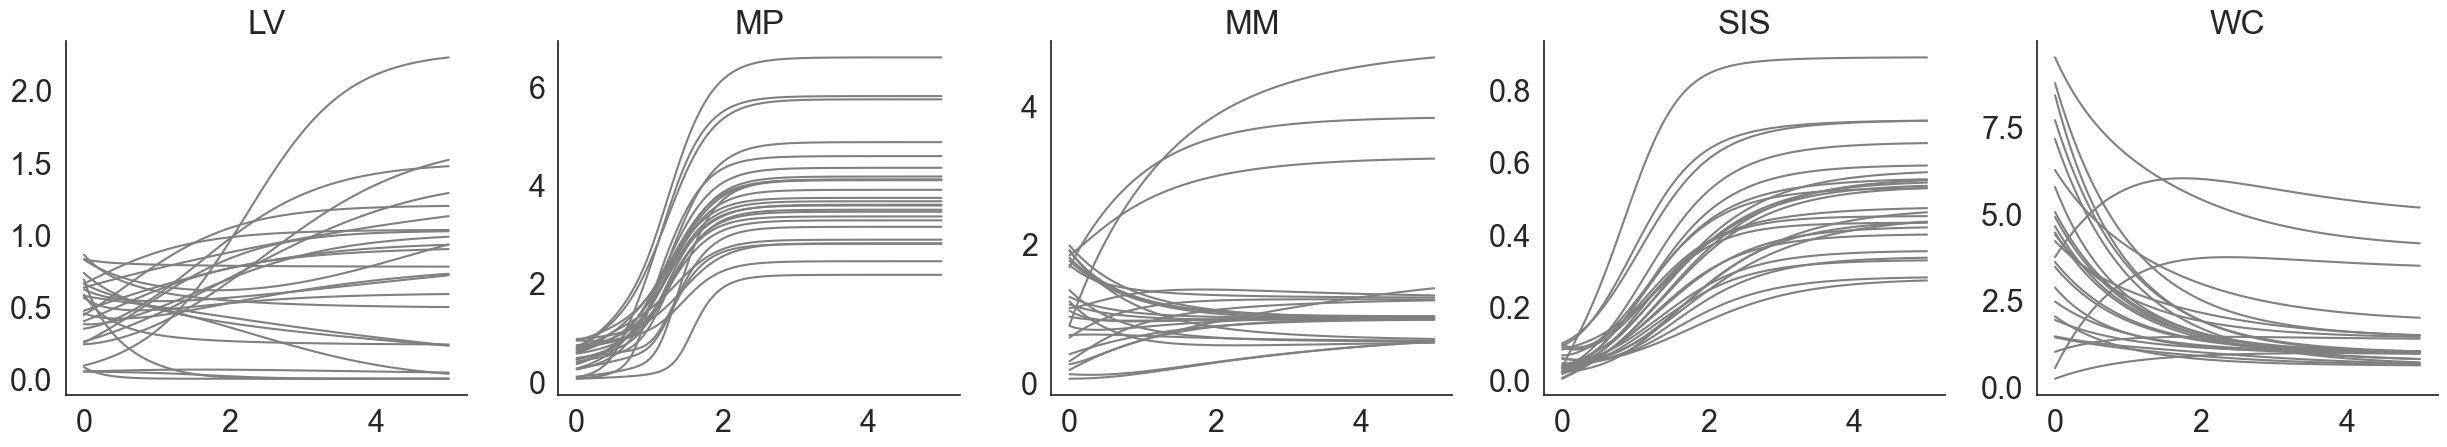

In [130]:
fig,ax = plt.subplots(1,5)
fig.set_size_inches(25,5)
sns.set(font_scale = 2, style = 'white')

models = [LV,MP,MM,SIS,WC]
models_params = [LV_params,MP_params,MM_params,SIS_params,WC_params]
models_IC = [LV_IC,MP_IC,MM_IC,SIS_IC,WC_IC]
models_names = ['LV','MP','MM','SIS','WC']

for idx,model in enumerate(models):
    f,g = model()
    x = sp.integrate.odeint(ODE,models_IC[idx],t,args=(A,f,g,models_params[idx],))
    #for n in range(0,int(N/5)):
        #ax[idx].plot(t,x[:,n*1],'black')
    for n in range(0,N):
        ax[idx].plot(t,x[:,n],'grey',alpha=1)
    ax[idx].set_title(models_names[idx])

sns.despine()
plt.tight_layout()
plt.show()

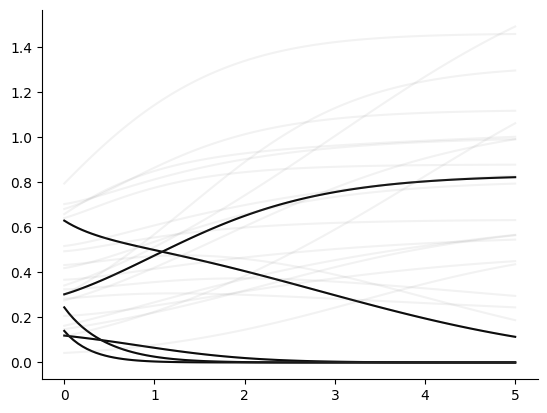

In [30]:
for n in range(0,int(N/5)):
    plt.plot(t,x[:,n*1],'black')
for n in range(0,N):
    plt.plot(t,x[:,n],'grey',alpha=0.1)
sns.despine()

f,g = LV()
x = sp.integrate.odeint(ODE,x0,t,args=(A,f,g,LV_params,))
f,g = MP()
x = sp.integrate.odeint(ODE,x0,t,args=(A,f,g,LV_params,))